# Stock market analysis using LSTM


In this project, we will explore data from Apple, Amazon and Google companies. We are using yfinance to get the stock information, and visualize different aspects of it using Seaborn and Matplotlib. we will be analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!
1. Importing packages and data
2. Data preparation
3. Data Visulaization
4. Relative Strength Index calculation
5. Simple Moving Average
6. Exponential Moving Average
7. Daily returns of stock each day
8. Correlation between each stock
9. Risk Analysis
10. Closing price prediction



# Importing packages and data

In [3]:
#Import packages and get the data
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader.data as pdr
import yfinance as yf

# For time stamps
from datetime import datetime




In [4]:
# The tech stocks we'll use for this analysis are AAPL, AMZN, GOOG in the time period 2010-01-01 till today
tech_list = ['AAPL', 'GOOG', 'AMZN']

start = "2010-01-01"
end = datetime.now()
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
company_list = [AAPL, GOOG, AMZN]
company_name = ["APPLE", "GOOGLE", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600,APPLE
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800,APPLE
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000,APPLE
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410792,477131200,APPLE
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800,APPLE
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.396484,462229600,APPLE
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.323723,594459600,APPLE
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.412921,605892000,APPLE
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.375781,432894000,APPLE


In [5]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3280.000000,3280.000000,3280.000000,3280.000000,3280.000000,3.280000e+03
mean,51.488535,52.063374,50.918875,51.511219,49.664270,2.558371e+08
std,47.428137,48.040361,46.828192,47.455447,47.927688,2.224677e+08
min,6.870357,7.000000,6.794643,6.858929,5.846674,3.519590e+07
25%,18.974196,19.150536,18.784374,18.972232,16.629047,1.020780e+08
50%,29.809999,30.023749,29.610000,29.910000,27.521924,1.663764e+08
75%,57.558125,58.157501,56.868751,57.370625,55.897990,3.451644e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,1.880998e+09


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3280 entries, 2010-01-04 to 2023-01-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3280 non-null   float64
 1   High          3280 non-null   float64
 2   Low           3280 non-null   float64
 3   Close         3280 non-null   float64
 4   Adj Close     3280 non-null   float64
 5   Volume        3280 non-null   int64  
 6   company_name  3280 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 205.0+ KB


# Data Visualization

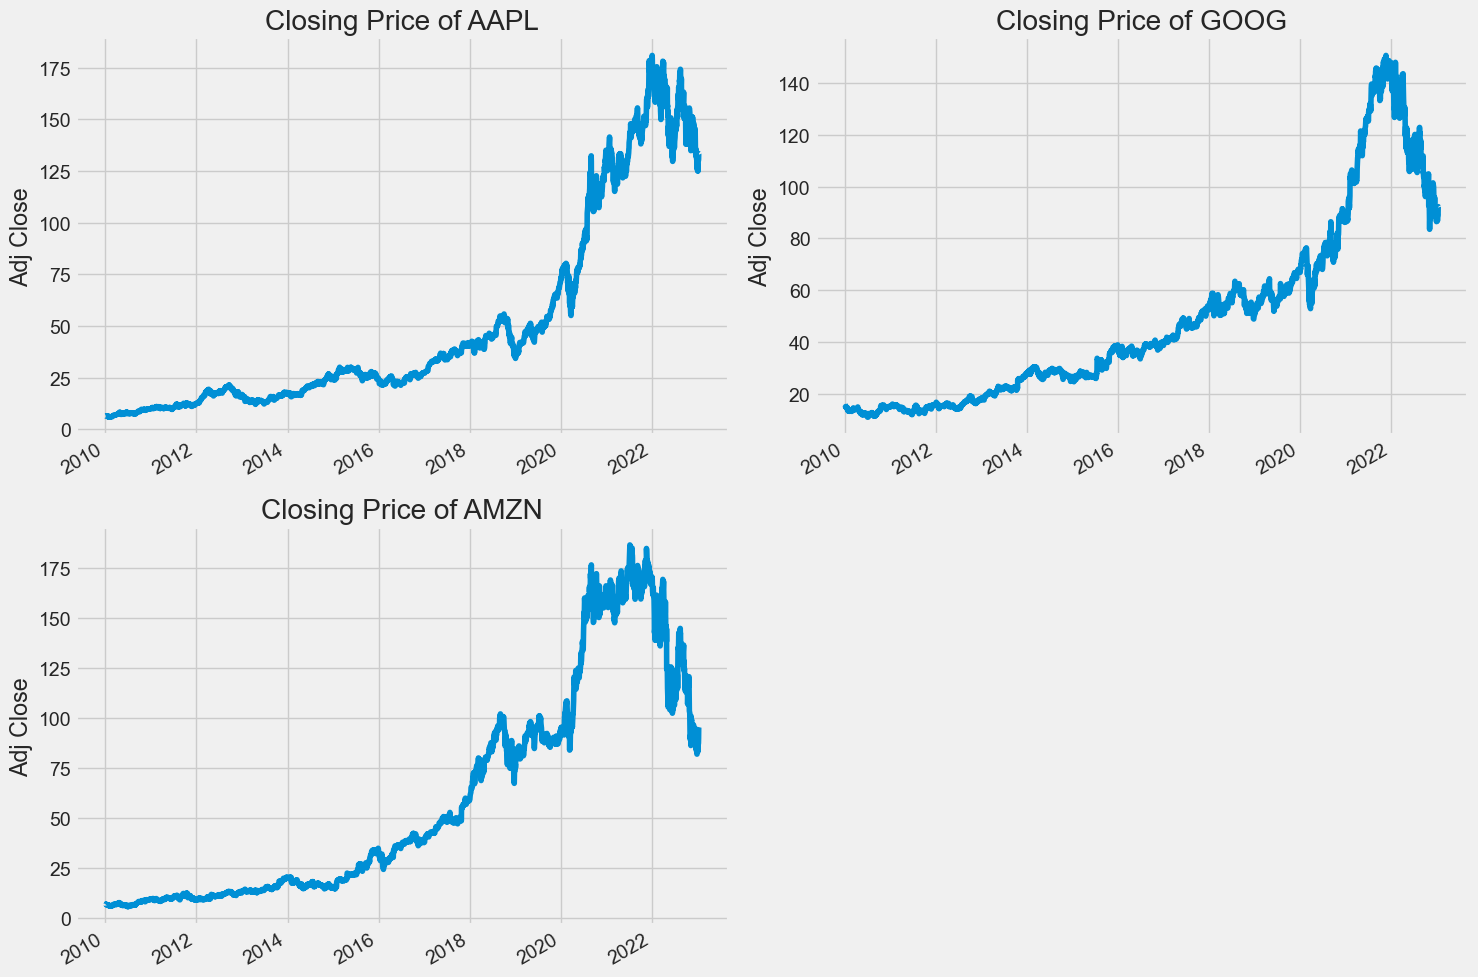

In [7]:
#Treds in closing price over the years
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

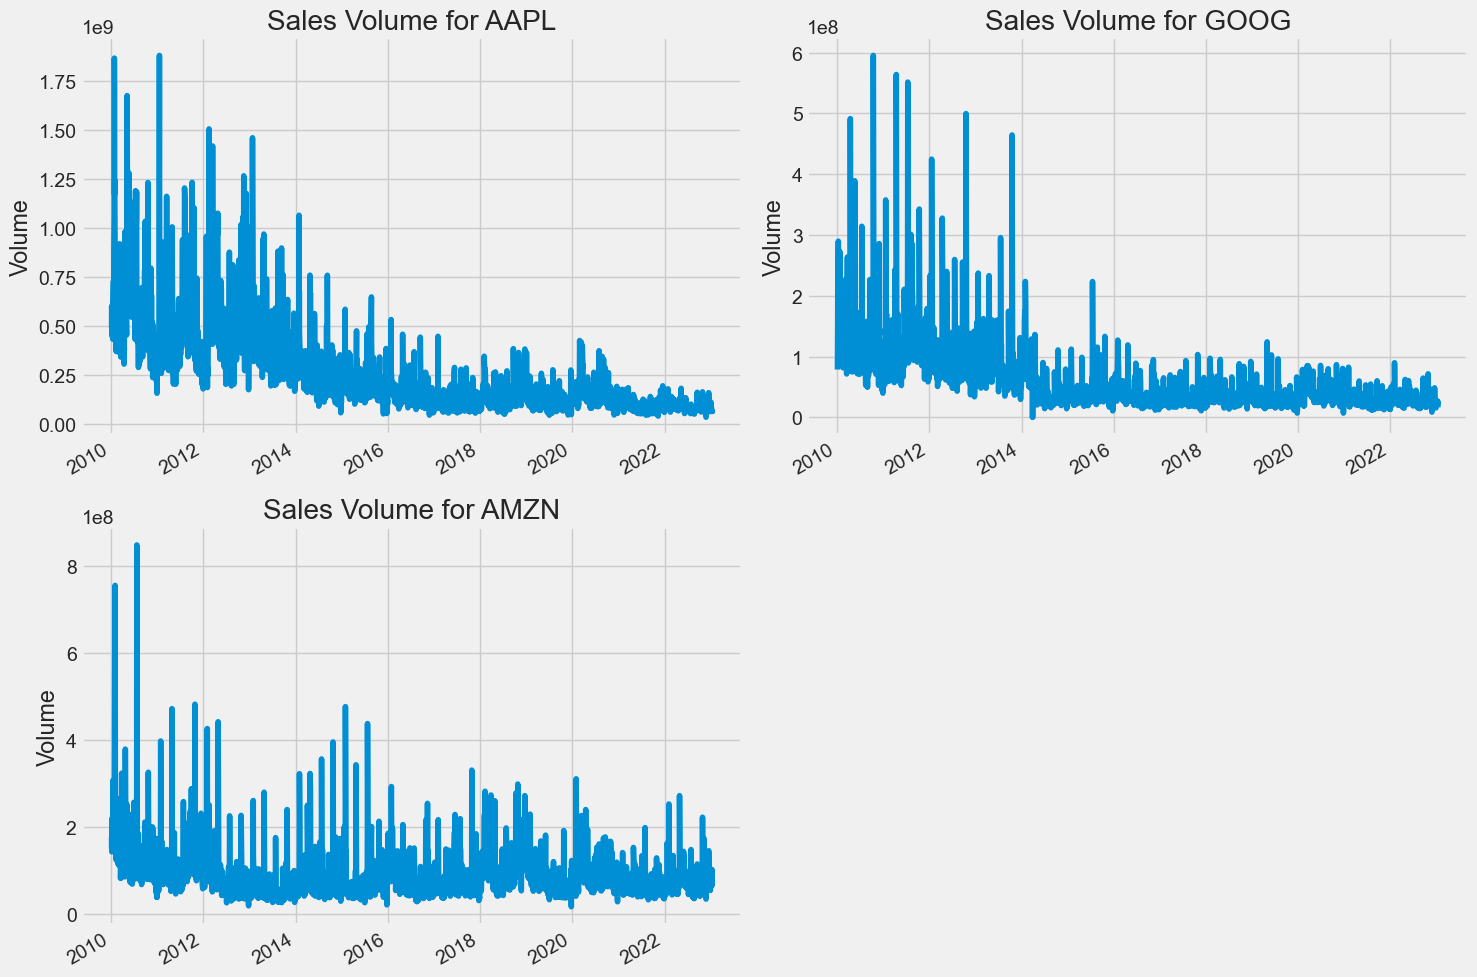

In [8]:
# total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# Relative Strength Index

In [9]:
def RSI(series, period):
    
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
         pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
    
    return 100 - 100 / (1 + rs)


def rsi_class(x):
    ret = "low"
    if x < 50:
        ret = "low"
    if x > 50:
        ret = "med"
    if x > 70:
        ret = "high"
    return(ret)

In [10]:
def feature_engineering(df):
    
    df['rsi'] = RSI( df['Close'], 14 )
    df['rsicat'] = list(map(rsi_class, df['rsi']))
    
    return df

In [11]:
df_aapl = yf.download('AAPL',start,end)
df_goog = yf.download('GOOG',start,end)
df_amzn = yf.download('AMZN',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
df_aapl = df_aapl.reset_index()
df_goog = df_goog.reset_index()
df_amzn = df_amzn.reset_index()

In [13]:
df_aapl = feature_engineering(df_aapl)
df_stock = df_aapl.copy().set_index('Date').reset_index()

C:\Users\Srividya\AppData\Local\Temp\ipykernel_21836\366464063.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
C:\Users\Srividya\AppData\Local\Temp\ipykernel_21836\366464063.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses


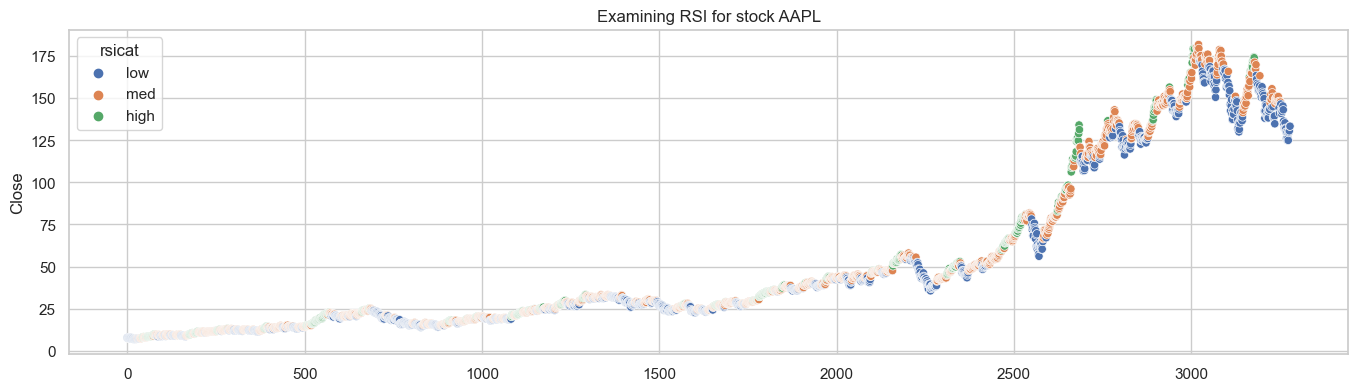

In [14]:
sns.set(rc={'figure.figsize':(14.7,4)})
sns.set_style("whitegrid")
plt.title(f"Examining RSI for stock AAPL")
ax = sns.scatterplot(x = df_stock.index, y = df_stock["Close"], hue = df_stock["rsicat"]);
plt.show()

In [15]:
df_goog = feature_engineering(df_goog)
df_stock_goog = df_goog.copy().set_index('Date').reset_index()

C:\Users\Srividya\AppData\Local\Temp\ipykernel_21836\366464063.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
C:\Users\Srividya\AppData\Local\Temp\ipykernel_21836\366464063.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses


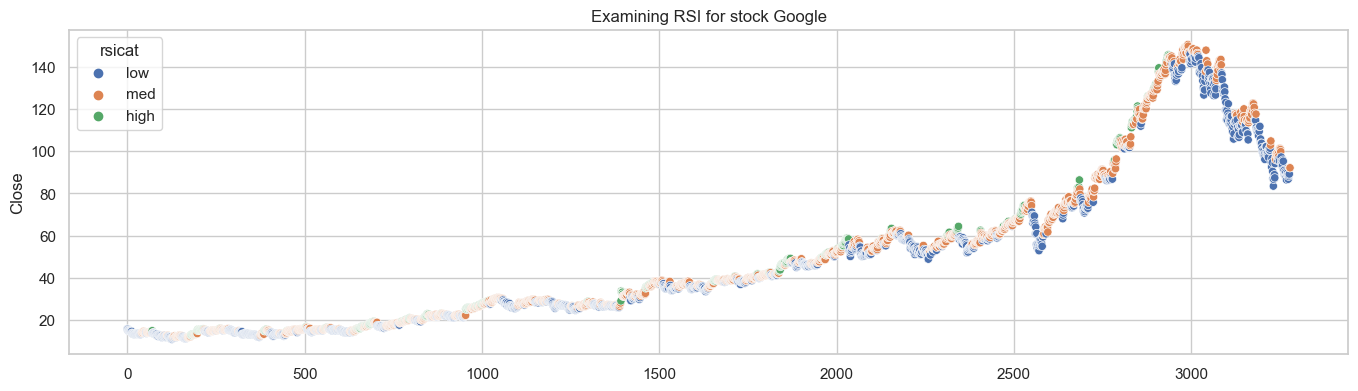

In [16]:
sns.set(rc={'figure.figsize':(14.7,4)})
sns.set_style("whitegrid")
plt.title(f"Examining RSI for stock Google")
ax = sns.scatterplot(x = df_stock_goog.index, y = df_stock_goog["Close"], hue = df_stock_goog["rsicat"]);
plt.show()

In [17]:
df_amzn = feature_engineering(df_amzn)
df_stock_amzn = df_amzn.copy().set_index('Date').reset_index()

C:\Users\Srividya\AppData\Local\Temp\ipykernel_21836\366464063.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
C:\Users\Srividya\AppData\Local\Temp\ipykernel_21836\366464063.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses


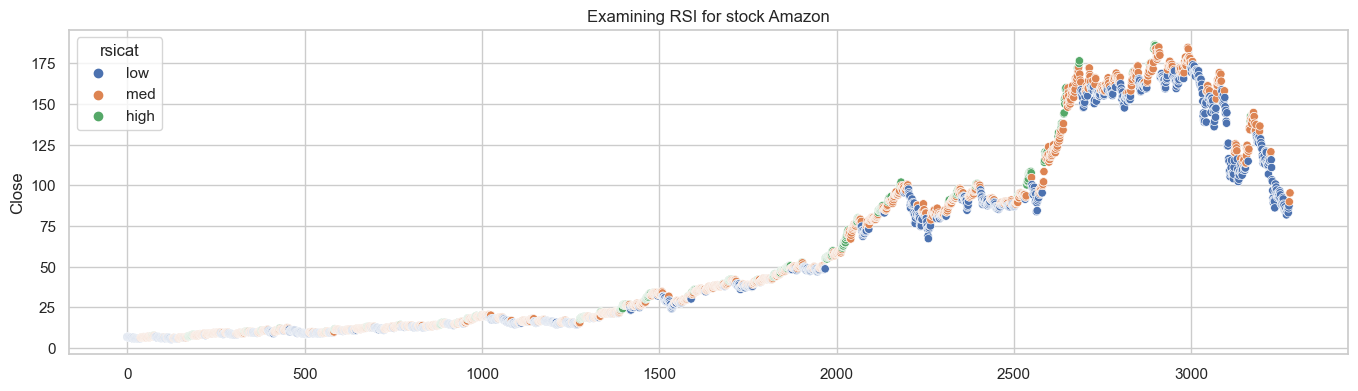

In [18]:
sns.set(rc={'figure.figsize':(14.7,4)})
sns.set_style("whitegrid")
plt.title(f"Examining RSI for stock Amazon")
ax = sns.scatterplot(x = df_stock_amzn.index, y = df_stock_amzn["Close"], hue = df_stock_amzn["rsicat"]);
plt.show()

# Simple Moving Average

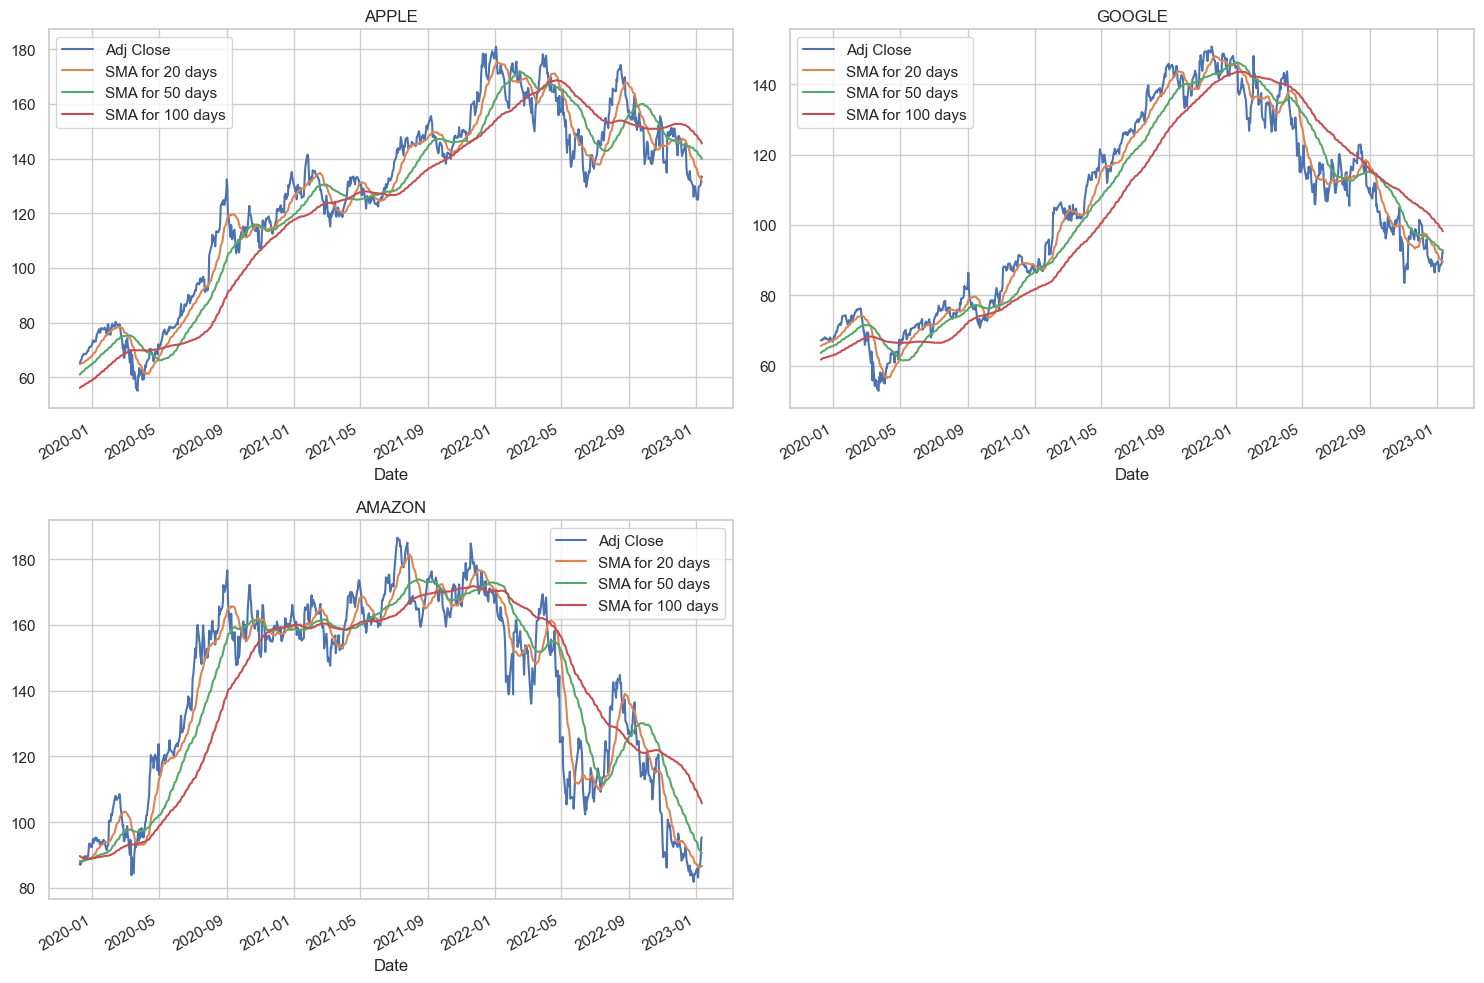

In [19]:
sma_day = [20, 50, 100]

for sma in sma_day:
    for company in company_list:
        column_name = f"SMA for {sma} days"
        company[column_name] = company['Adj Close'].rolling(sma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'SMA for 20 days', 'SMA for 50 days', 'SMA for 100 days']][2500:].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'SMA for 20 days', 'SMA for 50 days', 'SMA for 100 days']][2500:].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

AMZN[['Adj Close', 'SMA for 20 days', 'SMA for 50 days', 'SMA for 100 days']][2500:].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')
fig.delaxes(axes[1,1])

fig.tight_layout()

# Exponential Moving Average


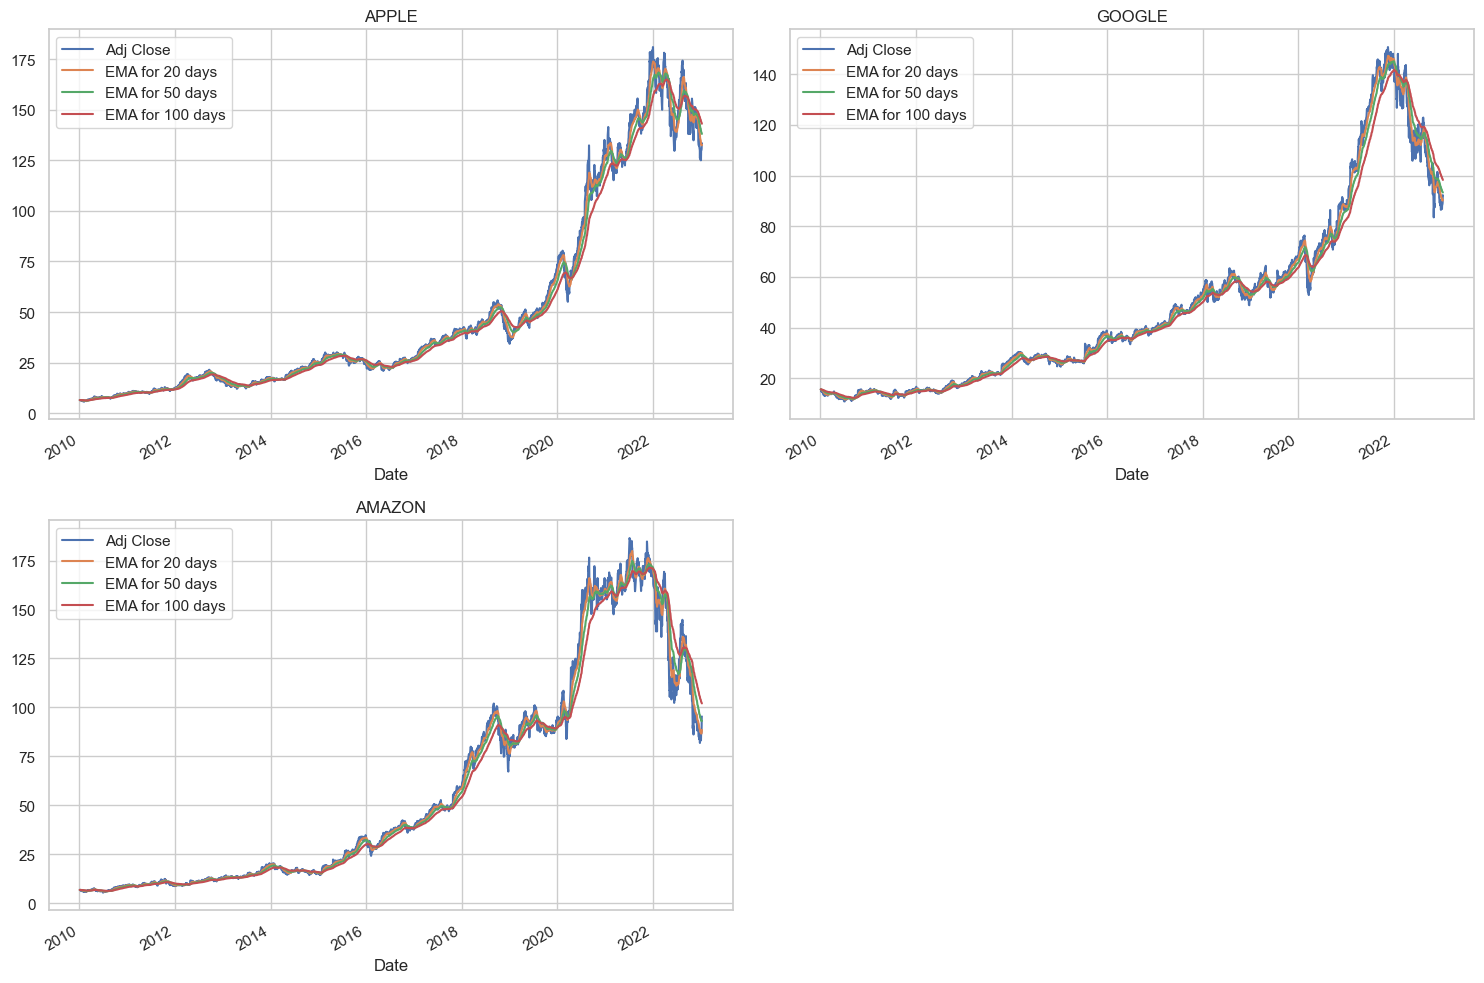

In [20]:
ema_day = [20, 50, 100]

for ema in ema_day:
    for company in company_list:
        column_name = f"EMA for {ema} days"
        company[column_name] = company['Adj Close'].ewm(span= ema ,adjust=False).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'EMA for 20 days', 'EMA for 50 days', 'EMA for 100 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'EMA for 20 days', 'EMA for 50 days', 'EMA for 100 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

AMZN[['Adj Close', 'EMA for 20 days', 'EMA for 50 days', 'EMA for 100 days']].plot(ax=axes[1,0])
axes[1,0].set_title('AMAZON')

fig.delaxes(axes[1,1])
fig.tight_layout()

 # Daily returns of stock each day

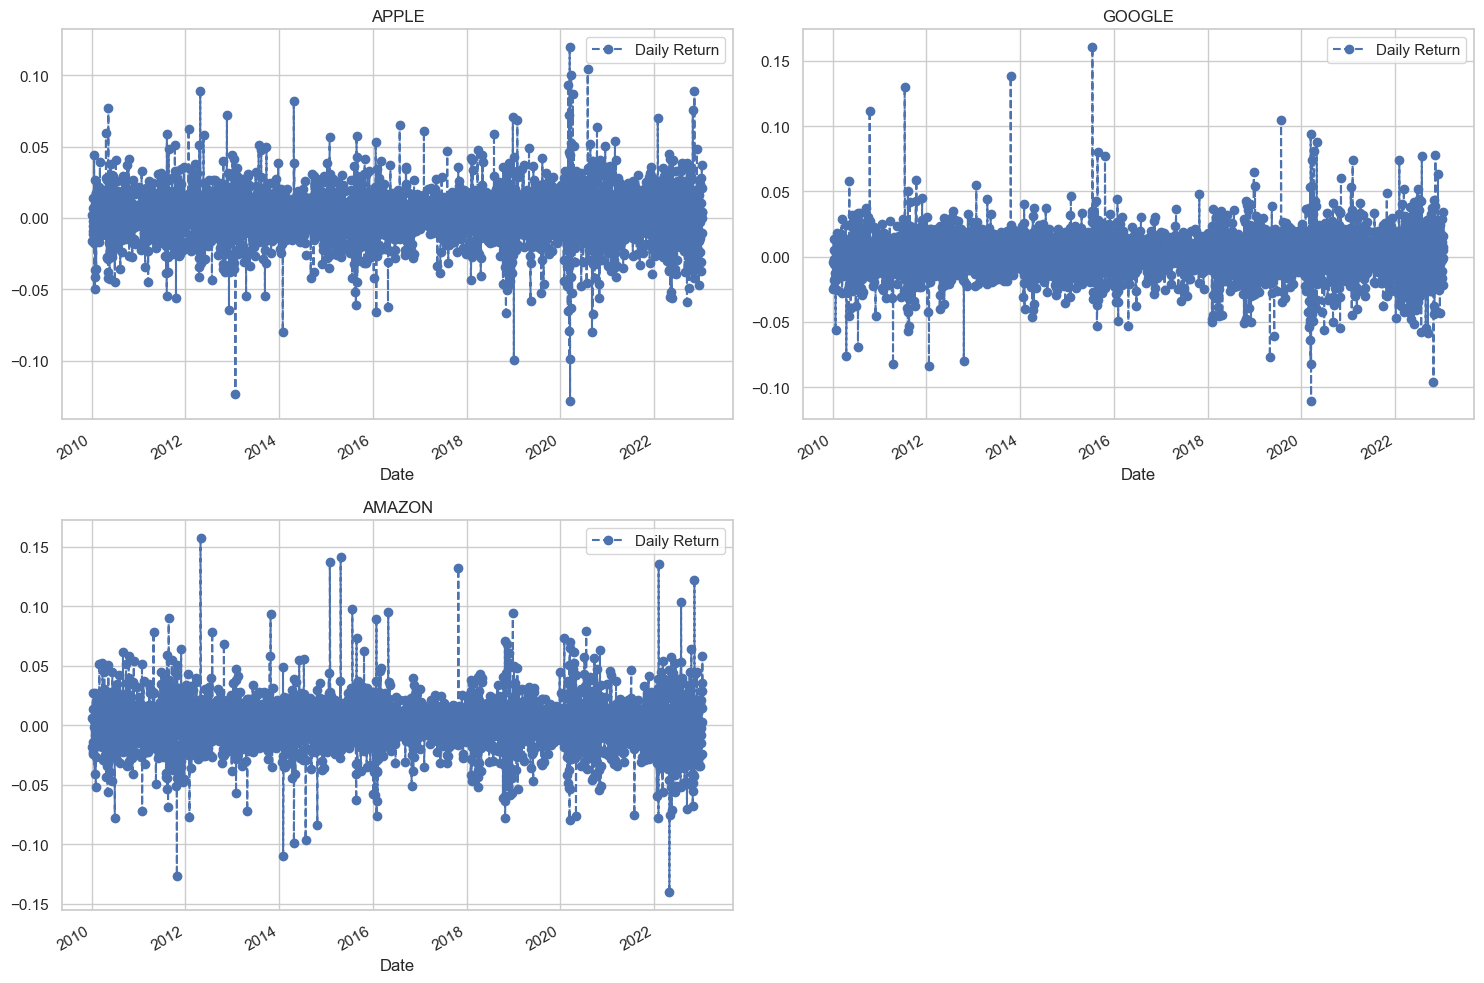

In [21]:
# We'll use pct_change to find the percent change for each day(Daily returns of the stock)
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

AMZN['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('AMAZON')
fig.delaxes(axes[1,1])
fig.tight_layout()

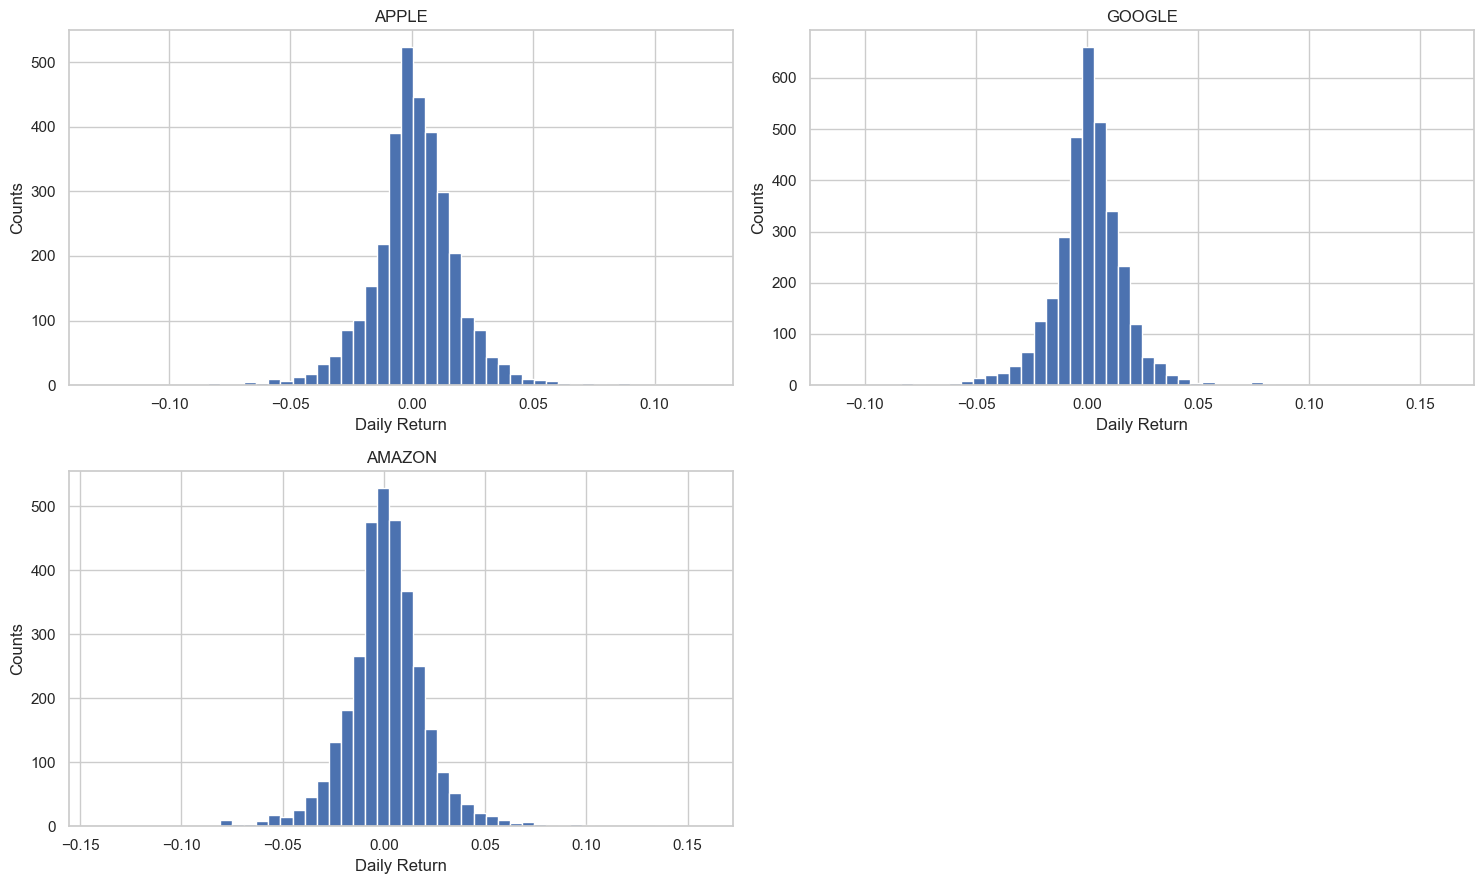

In [22]:
# Ploting daily returns of the stock using histogram
plt.figure(figsize=(15, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Correlation between different stocks closing prices

In [23]:
# Grab all the closing prices for the tech stock list into one DataFrame
#closing_df = pdr.DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df = yf.download(tech_list,start,end)['Adj Close']
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  3 of 3 completed


,AAPL,AMZN,GOOG
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.001729,0.005900,-0.004404
2010-01-06,-0.015907,-0.018116,-0.025209
2010-01-07,-0.001848,-0.017013,-0.023280
2010-01-08,0.006648,0.027077,0.013331


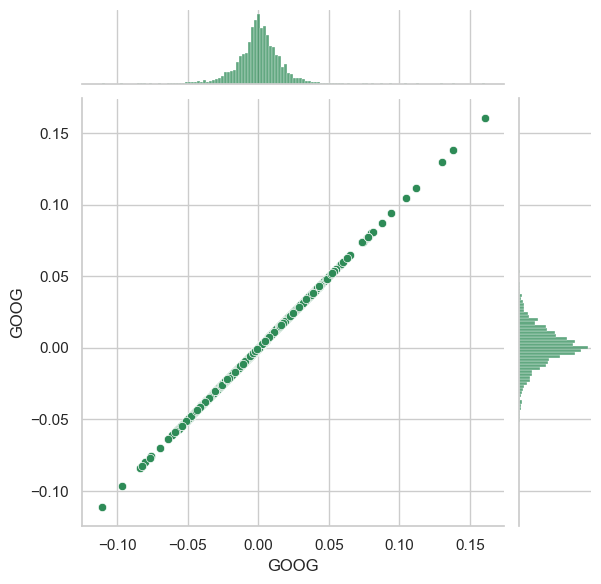

In [24]:
#correlation 1. Stock compared to itself
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

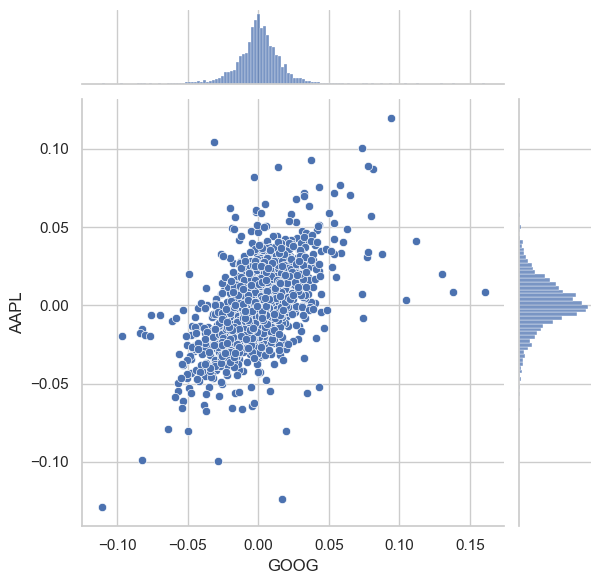

In [25]:
#Correlation 2. comparing between 2 stocks
# Using joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter')

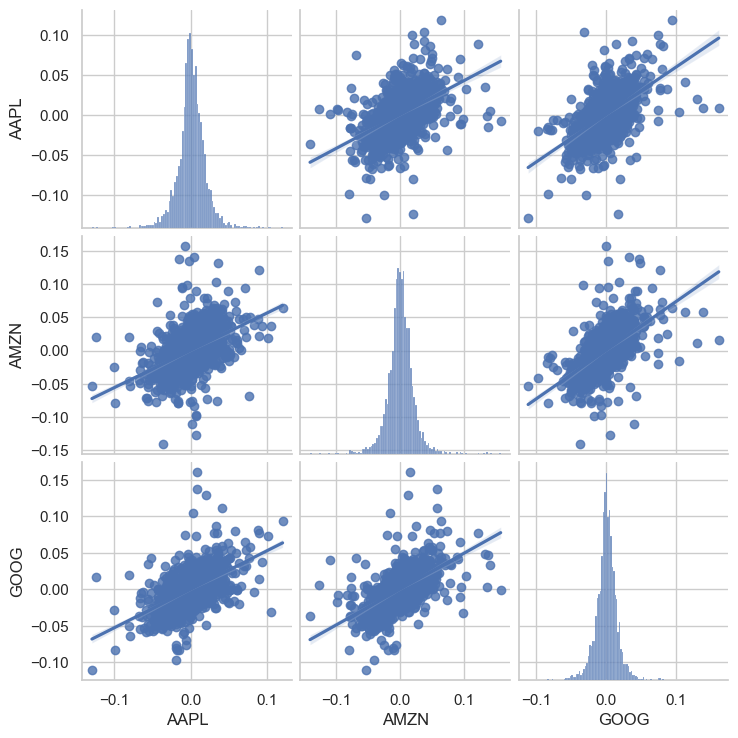

In [26]:
#Automatic visualization of all comparisons using pariplot AAPL v/s GOOG v/s AMZN

sns.pairplot(tech_rets, kind='reg')

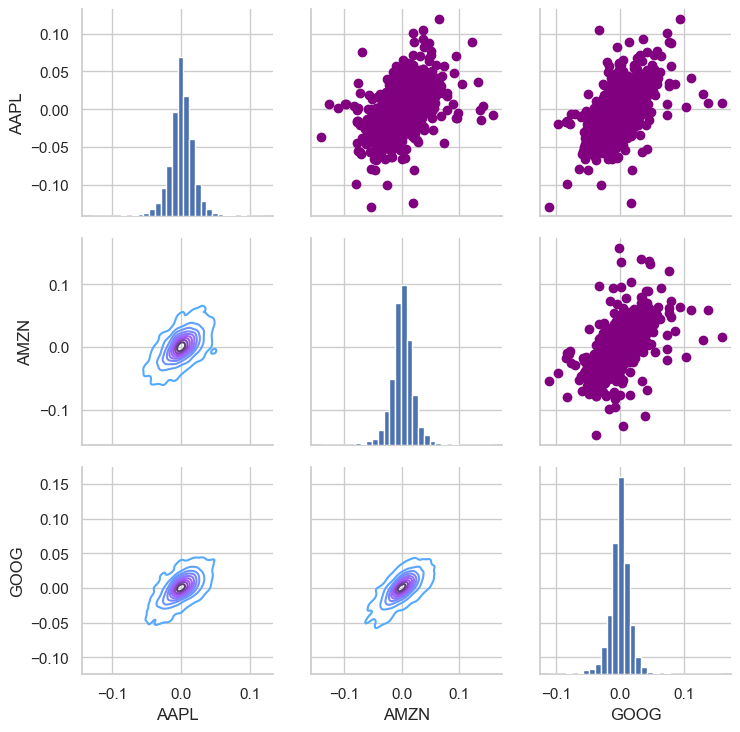

In [27]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

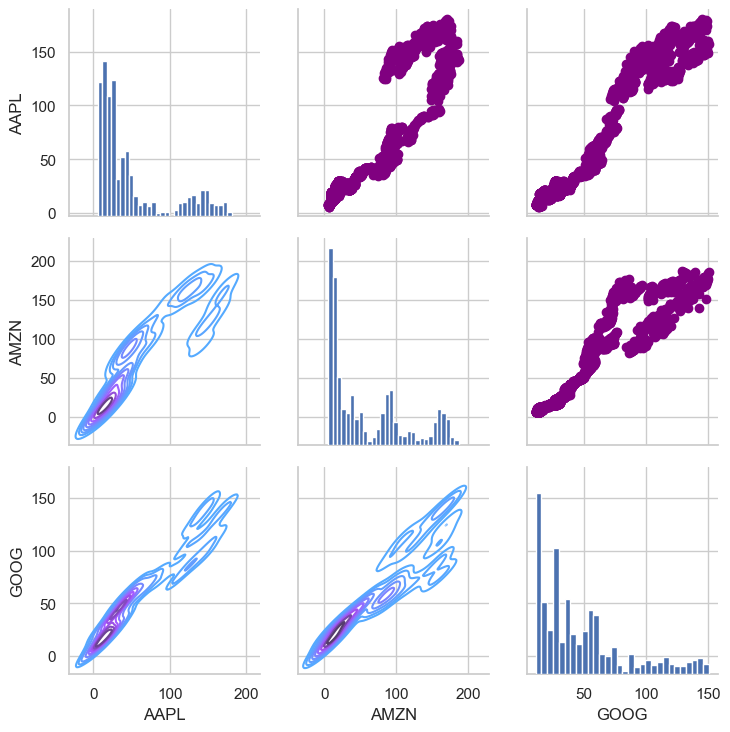

In [28]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

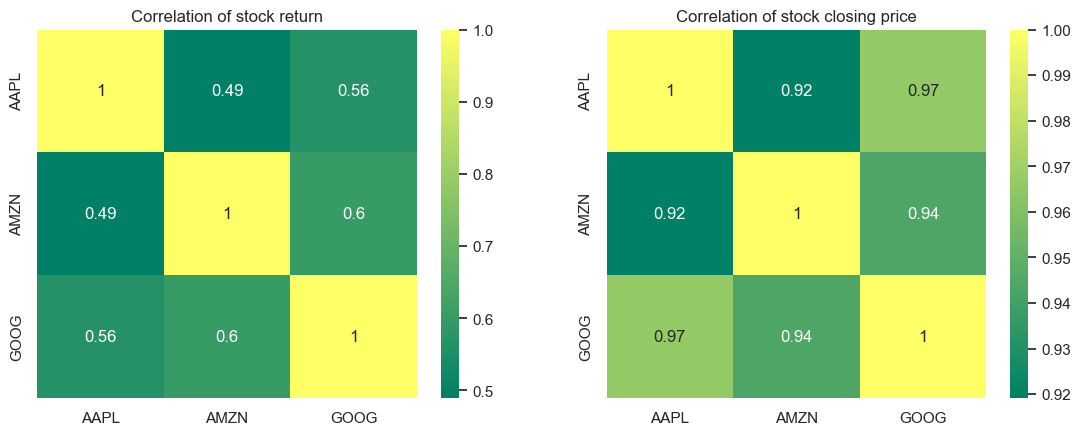

In [29]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

From the above plot we can see that all companies are positively correlated. 
Also, AMZN and GOOG has the strongest correlation of daily return.

# Risk analysis 
Using the information we've gathered on daily percentage returns, by comparing the expected return with the standard deviation of the daily returns.

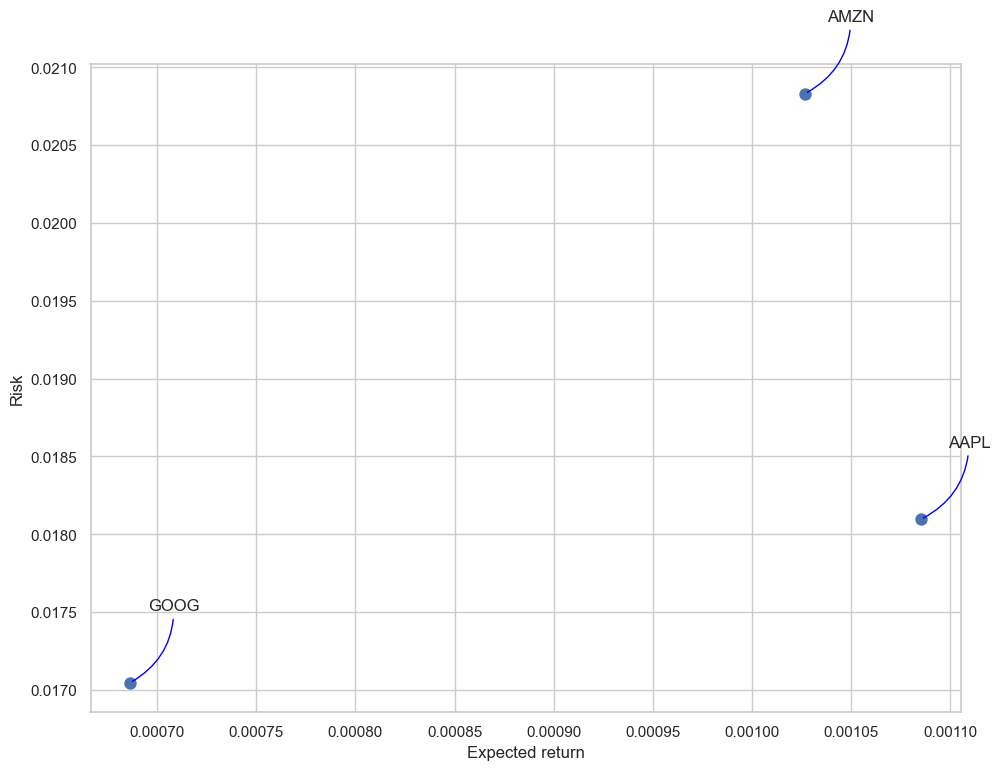

In [30]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Closing price prediction for AAPL


In [31]:
# Here we are considering AAPL 
df = yf.download('AAPL', start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422666,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410789,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800
...,...,...,...,...,...,...
2023-01-06,126.010002,130.289993,124.889999,129.619995,129.619995,87686600
2023-01-09,130.470001,133.410004,129.889999,130.149994,130.149994,70790800
2023-01-10,130.259995,131.259995,128.119995,130.729996,130.729996,63896200


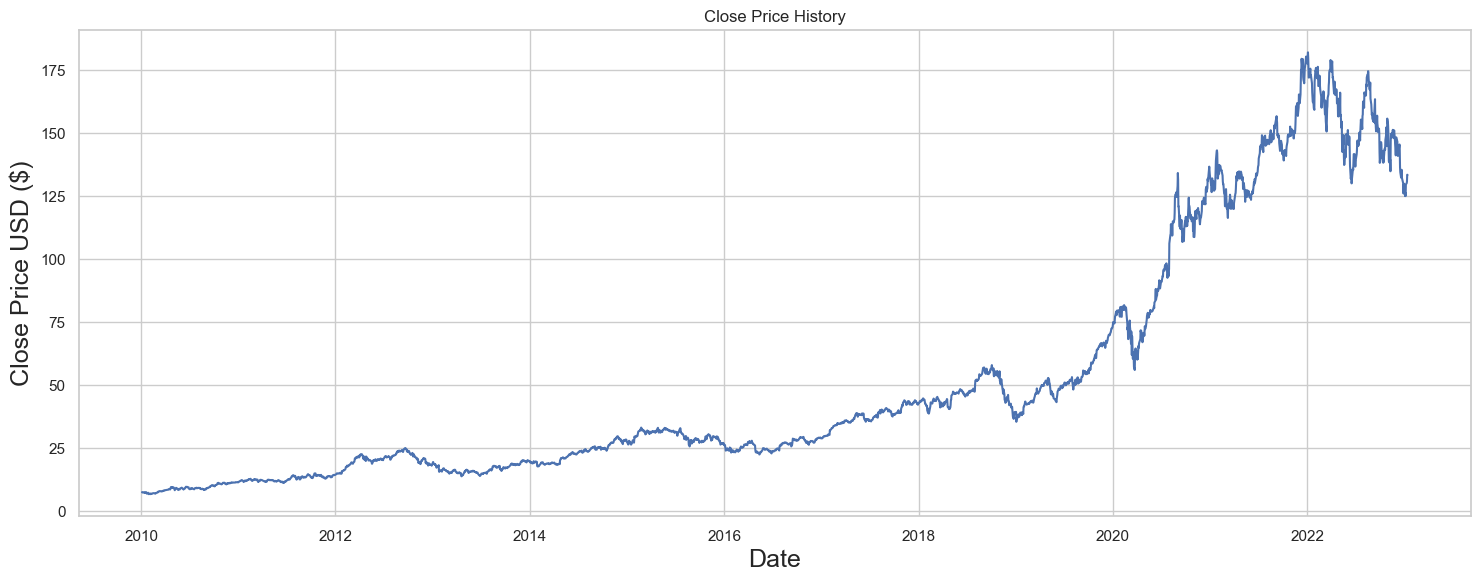

In [38]:
#Closing price over the years
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [46]:
# Creating a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Converting the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80))

training_data_len


2624

In [47]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.70722417],
       [0.72298205],
       [0.72269656]])

In [48]:
#Creating the training dataset
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([4.47776362e-03, 4.55321042e-03, 3.85789270e-03, 3.77836496e-03,
       4.06383392e-03, 3.68253530e-03, 3.19519517e-03, 3.79263868e-03,
       3.54387631e-03, 2.83020666e-03, 4.68778577e-03, 4.01286179e-03,
       3.26656105e-03, 1.16225866e-03, 2.24703686e-03, 2.83224576e-03,
       3.22782354e-03, 1.47627233e-03, 2.03638039e-06, 5.46463221e-04,
       7.76876395e-04, 1.46403771e-03, 0.00000000e+00, 6.95312283e-04,
       4.22080672e-04, 8.44166789e-04, 6.25985509e-04, 1.34985068e-03,
       1.69853181e-03, 2.31432725e-03, 2.14100896e-03, 2.21848942e-03,
       1.96156791e-03, 1.70668550e-03, 1.02156329e-03, 1.75562669e-03,
       2.02885830e-03, 2.56308963e-03, 3.45416123e-03, 3.42561379e-03,
       3.52348256e-03, 3.80487330e-03, 5.48505863e-03, 5.51156697e-03,
       6.31495443e-03, 6.68606025e-03, 6.82063559e-03, 7.04493690e-03,
       6.48215813e-03, 6.60653796e-03, 6.53925029e-03, 6.64732002e-03,
       6.15794623e-03, 6.66771105e-03, 7.40380811e-03, 7.60975477e-03,
     

In [49]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Building the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs = 1)

2564/2564 [==============================] - 75s 28ms/step - loss: 2.2517e-04


In [51]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
len(test_data)

716

In [52]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))



In [53]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

21/21 [==============================] - 1s 17ms/step


4.878845113117641

In [92]:
from keras.models import load_model
    
model.save('model_apple.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model
    
    # returns a compiled model
    # identical to the previous one
model = load_model('model_apple.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_9 (LSTM)               (None, 50)                30200     
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 72,301
Trainable params: 72,301
Non-trainable params: 0
_________________________________________________________________


In [93]:
pred = model.predict(x_test)
pred

21/21 [==============================] - 1s 20ms/step


array([[0.4143739 ],
       [0.41522616],
       [0.4168774 ],
       [0.41921282],
       [0.41809323],
       [0.41599032],
       [0.41404378],
       [0.4137769 ],
       [0.4149021 ],
       [0.415769  ],
       [0.41617087],
       [0.41736406],
       [0.41940632],
       [0.41973156],
       [0.41966617],
       [0.41487595],
       [0.41050345],
       [0.40802184],
       [0.4083311 ],
       [0.4115556 ],
       [0.41747874],
       [0.4231793 ],
       [0.4283599 ],
       [0.43308586],
       [0.43833637],
       [0.44112706],
       [0.44267157],
       [0.44282946],
       [0.44247976],
       [0.44179577],
       [0.44388798],
       [0.44661736],
       [0.4498644 ],
       [0.44988862],
       [0.44813925],
       [0.44675866],
       [0.44412825],
       [0.44261968],
       [0.44247   ],
       [0.44041687],
       [0.43740454],
       [0.43390083],
       [0.43125698],
       [0.4309906 ],
       [0.43169415],
       [0.4329218 ],
       [0.4333263 ],
       [0.434

C:\Users\Srividya\AppData\Local\Temp\ipykernel_21836\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


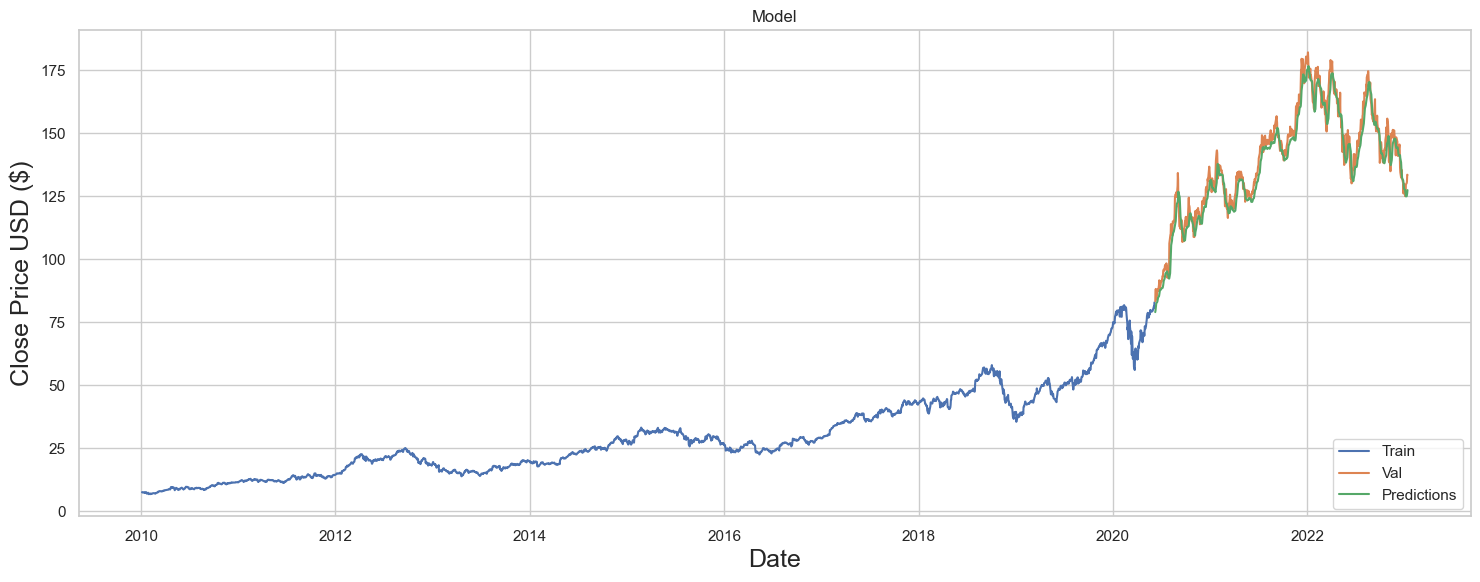

In [57]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [58]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-06-08,83.364998,79.032570
2020-06-09,85.997498,79.628220
2020-06-10,88.209999,80.599655
2020-06-11,83.974998,81.937798
2020-06-12,84.699997,82.581902
...,...,...
2023-01-06,129.619995,124.921768
2023-01-09,130.149994,124.970459
2023-01-10,130.729996,125.473961


# Closing price predicitons for Google

In [79]:
# Here we are considering AAPL 
df2 = yf.download('GOOG', start= "2010-01-01")
df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313
...,...,...,...,...,...,...
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26604400
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
2023-01-10,86.720001,89.474998,86.699997,89.239998,89.239998,22855600


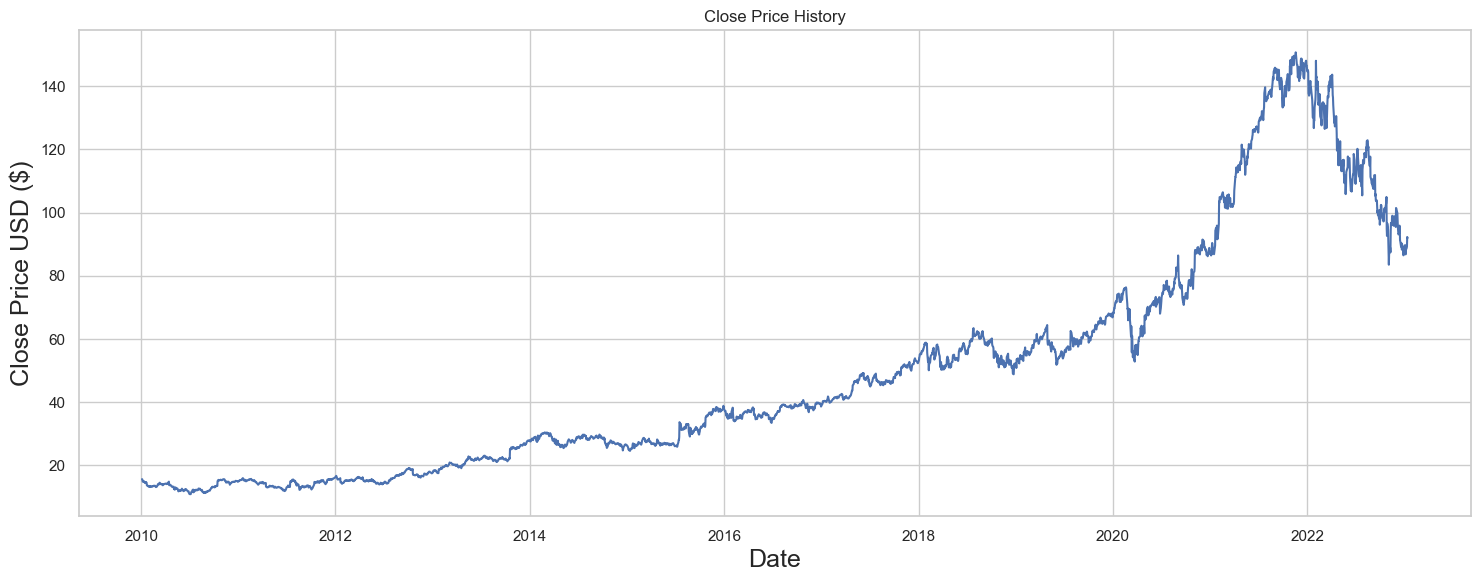

In [80]:
#Closing price over the years
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df2['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [81]:
# Creating a new dataframe with only the 'Close column 
data2 = df2.filter(['Close'])
# Converting the dataframe to a numpy array
dataset2 = data2.values
# Get the number of rows to train the model on
training_data_len2 = int(np.ceil( len(dataset2) * .80))

training_data_len2


2624

In [82]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = scaler.fit_transform(dataset)

scaled_data2

array([[0.03395973],
       [0.03346818],
       [0.0306667 ],
       ...,
       [0.56045836],
       [0.58205327],
       [0.57969355]])

In [83]:
#Creating the training dataset
train_data2 = scaled_data2[0:int(training_data_len), :]

x_train2 = []
y_train2 = []

for i in range(60, len(train_data2)):
    x_train2.append(train_data2[i-60:i, 0])
    y_train2.append(train_data2[i, 0])
    if i<= 61:
        print(x_train2)
        print(y_train2)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train2, y_train2 = np.array(x_train2), np.array(y_train2)

# Reshape the data
x_train2 = np.reshape(x_train2, (x_train2.shape[0], x_train2.shape[1], 1))
# x_train.shape

[array([0.03395973, 0.03346818, 0.0306667 , 0.02814483, 0.02955537,
       0.0293933 , 0.02750011, 0.02689636, 0.02738791, 0.02563365,
       0.02699075, 0.02570667, 0.02616438, 0.02029249, 0.01850973,
       0.01894073, 0.01888374, 0.01749279, 0.01671806, 0.0172666 ,
       0.01692822, 0.01865576, 0.01615527, 0.01695849, 0.01734675,
       0.0178757 , 0.01752128, 0.01786858, 0.01728441, 0.01874125,
       0.01819094, 0.0190832 , 0.01864509, 0.0190084 , 0.01763171,
       0.01699055, 0.01609293, 0.01615883, 0.01720783, 0.01869852,
       0.01945721, 0.02110818, 0.02282148, 0.02251337, 0.02210552,
       0.0250014 , 0.02583668, 0.02555172, 0.02263804, 0.0229978 ,
       0.02306191, 0.02321152, 0.02207169, 0.02162644, 0.02011261,
       0.02159617, 0.02258461, 0.02255077, 0.02250803, 0.02326673])]
[0.02333974812838087]

[array([0.03395973, 0.03346818, 0.0306667 , 0.02814483, 0.02955537,
       0.0293933 , 0.02750011, 0.02689636, 0.02738791, 0.02563365,
       0.02699075, 0.02570667, 0.02

In [84]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Building the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train2, y_train2, batch_size=1, epochs = 1)

2564/2564 [==============================] - 70s 26ms/step - loss: 3.0798e-04


In [85]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data2 = scaled_data2[training_data_len2 - 60: , :]
# Create the data sets x_test and y_test
x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
len(test_data2)

716

In [86]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data2 = scaled_data2[training_data_len2 - 60: , :]
# Create the data sets x_test and y_test
x_test2 = []
y_test2 = dataset2[training_data_len2:, :]
for i in range(60, len(test_data2)):
    x_test2.append(test_data2[i-60:i, 0])
    
# Convert the data to a numpy array
x_test2 = np.array(x_test2)

# Reshape the data
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1 ))



In [87]:
# Get the models predicted price values 
predictions_google = model.predict(x_test2)
predictions_google = scaler.inverse_transform(predictions_google)

# Get the root mean squared error (RMSE)
rmse_google = np.sqrt(np.mean(((predictions_google - y_test2) ** 2)))
rmse_google

21/21 [==============================] - 1s 17ms/step


10.898364628091045

In [88]:
from keras.models import load_model
    
model.save('model_google.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model
    
    # returns a compiled model
    # identical to the previous one
model = load_model('model_google.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 100)           40800     
                                                                 
 lstm_9 (LSTM)               (None, 50)                30200     
                                                                 
 dense_8 (Dense)             (None, 25)                1275      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 72,301
Trainable params: 72,301
Non-trainable params: 0
_________________________________________________________________


In [89]:
pred2 = model.predict(x_test2)
pred2

21/21 [==============================] - 2s 17ms/step


array([[0.4143739 ],
       [0.41522616],
       [0.4168774 ],
       [0.41921282],
       [0.41809323],
       [0.41599032],
       [0.41404378],
       [0.4137769 ],
       [0.4149021 ],
       [0.415769  ],
       [0.41617087],
       [0.41736406],
       [0.41940632],
       [0.41973156],
       [0.41966617],
       [0.41487595],
       [0.41050345],
       [0.40802184],
       [0.4083311 ],
       [0.4115556 ],
       [0.41747874],
       [0.4231793 ],
       [0.4283599 ],
       [0.43308586],
       [0.43833637],
       [0.44112706],
       [0.44267157],
       [0.44282946],
       [0.44247976],
       [0.44179577],
       [0.44388798],
       [0.44661736],
       [0.4498644 ],
       [0.44988862],
       [0.44813925],
       [0.44675866],
       [0.44412825],
       [0.44261968],
       [0.44247   ],
       [0.44041687],
       [0.43740454],
       [0.43390083],
       [0.43125698],
       [0.4309906 ],
       [0.43169415],
       [0.4329218 ],
       [0.4333263 ],
       [0.434

C:\Users\Srividya\AppData\Local\Temp\ipykernel_21836\2477337607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid2['Predictions_google'] = predictions_google


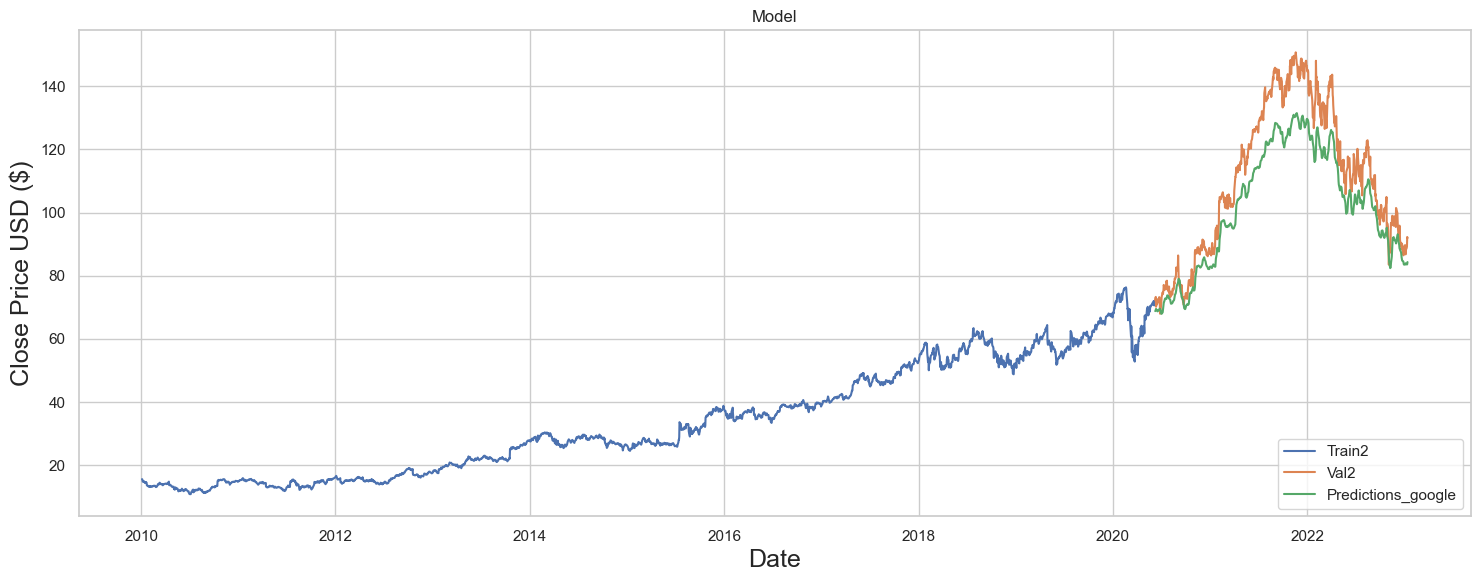

In [90]:
# Plot the data
train2 = data2[:training_data_len2]
valid2 = data2[training_data_len2:]
valid2['Predictions_google'] = predictions_google
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train2['Close'])
plt.plot(valid2[['Close', 'Predictions_google']])
plt.legend(['Train2', 'Val2', 'Predictions_google'], loc='lower right')
plt.show()

In [91]:
# Show the valid and predicted prices
valid2

,Close,Predictions_google
Date,,
2020-06-08,72.330498,68.810387
2020-06-09,72.807999,68.929573
2020-06-10,73.292503,69.160492
2020-06-11,70.192001,69.487099
2020-06-12,70.658997,69.330528
...,...,...
2023-01-06,88.160004,83.720177
2023-01-09,88.800003,83.568329
2023-01-10,89.239998,83.555237
